# Proyecto 3 Análisis Exploratorio

Micaela Yataz (carnet: 18960)
Edman Cota (carnet: 19830)
Edwin de Leon (carnet: 22809)

[Repositorio](https://github.com/edman-cota/proyecto3MD.git)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pyreadstat  # Instala pyreadstat si no lo tienes

import pyreadstat
import glob

# Obtener la lista de archivos .sav en el directorio actual
file_list = glob.glob("*.sav")

# Leer cada archivo y mostrar sus primeras 5 filas
for file in file_list:
    df, meta = pyreadstat.read_sav(file)  # Leer el archivo
    print(f"\nArchivo: {file}")
    print(df.head())  # Mostrar las primeras 5 filas
    print("-" * 50)  # Separador entre archivos


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^

[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



📂 Archivo: defunciones_2013.sav
   Depreg Mupreg  Mesreg  Añoreg  Depocu Mupocu  Areag  Sexo  Diaocu  Mesocu  \
0    13.0   1327    10.0  2013.0    13.0   1327    2.0   1.0     4.0    10.0   
1     1.0   0101     5.0  2013.0     1.0   0101    1.0   2.0    25.0     5.0   
2     8.0   0801     5.0  2013.0     8.0   0801    2.0   2.0    25.0     5.0   
3     6.0   0606     3.0  2013.0     6.0   0606    2.0   1.0    19.0     3.0   
4     1.0   0113     4.0  2013.0     1.0   0113    2.0   2.0     7.0     4.0   

   ...  Mnadif  Nacdif  Predif  Dredif  Mredif Caudef  \
0  ...    1327   320.0   320.0    13.0    1327   R000   
1  ...    2001   320.0   320.0     1.0    0101   R000   
2  ...    0801   320.0   320.0     8.0    0801   R000   
3  ...    0602   320.0  9999.0    99.0    9999   R000   
4  ...    0101   320.0  9999.0    99.0    9999   R011   

                    caudef.descrip  Asist Ocur  Cerdef  
0     Taquicardia, no especificada    1.0  6.0     9.0  
1     Taquicardia, no especif

In [4]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.stats import boxcox, shapiro


In [5]:
# Situación problemática y planteamiento
situacion_problematica = "El conjunto de datos proviene de registros de defunciones y busca identificar patrones en las causas de muerte, características demográficas y otros factores relevantes. Se necesita un análisis exploratorio para comprender mejor las variables y relaciones en los datos."
problema_cientifico = "¿Cuáles son los principales factores asociados a las defunciones registradas en los datos?"
objetivo_general = "Analizar los datos de defunciones para identificar patrones y factores clave relacionados con la mortalidad."
objetivos_especificos = [
    "Describir y limpiar el conjunto de datos para garantizar su calidad y consistencia.",
    "Realizar un análisis exploratorio de las variables demográficas y causas de muerte.",
    "Identificar posibles agrupaciones o tendencias en las defunciones a través de técnicas de análisis de datos."
]


In [7]:

# Cargar el CSV con todos los datos combinados
df_final = pd.read_csv("datos_combinados.csv")


C:\Users\edman\AppData\Local\Temp\ipykernel_27008\1261894571.py:2: DtypeWarning: Columns (15,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv("datos_combinados.csv")


In [8]:
def describe_data(df):
    print(" **Descripción del conjunto de datos:**")
    print(f"-  Número de observaciones: {df.shape[0]}")
    print(f"-  Número de variables: {df.shape[1]}")

    print("\n **Tipos de variables:**")
    print(df.dtypes.value_counts())

    print("\n **Valores faltantes por variable:**")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print(missing_values)
    else:
        print(" No hay valores faltantes en el conjunto de datos.")

    print("\n **Resumen estadístico de variables numéricas:**")
    print(df.describe())

    print("\n **Resumen de variables categóricas:**")
    categorical_cols = df.select_dtypes(include=['object']).columns
    if not categorical_cols.empty:
        print(df[categorical_cols].describe())
    else:
        print(" No se encontraron variables categóricas.")

# Ejecutar la función con el dataset cargado
describe_data(df_final)

 **Descripción del conjunto de datos:**
-  Número de observaciones: 878136
-  Número de variables: 30

 **Tipos de variables:**
float64    22
int64       4
object      4
Name: count, dtype: int64

 **Valores faltantes por variable:**
Añoocu            154446
Areag             478523
caudef.descrip    801497
dtype: int64

 **Resumen estadístico de variables numéricas:**
              Depreg         Mupreg         Mesreg         Añoreg  \
count  878136.000000  878136.000000  878136.000000  878136.000000   
mean        8.631909     869.103804       6.509013    2017.836156   
std         6.678967     669.508143       3.423374       2.898027   
min         1.000000     101.000000       1.000000    2013.000000   
25%         1.000000     101.000000       4.000000    2015.000000   
50%         9.000000     901.000000       7.000000    2018.000000   
75%        14.000000    1406.000000       9.000000    2020.000000   
max        22.000000    2217.000000      12.000000    2023.000000   

      

## Análisis de los Resultados del Conjunto de Datos
Dimensión y Composición del Dataset
El conjunto de datos comprende 878,136 observaciones y 30 variables, lo que indica una base de datos robusta que abarca múltiples dimensiones del fenómeno estudiado. La diversidad de tipos de variables—22 de tipo float64, 4 de tipo int64 y 4 categóricas (object)—sugiere la coexistencia de datos cuantitativos y cualitativos, lo que permite un análisis integral tanto desde una perspectiva descriptiva como inferencial.

### Valores Faltantes y Calidad de los Datos
Se identificaron valores faltantes en tres variables clave:

- Añoocu (154,446 valores nulos): Representa un 17.6% del total de registros, lo que puede impactar la secuencia temporal del análisis de tendencias.

- Areag (478,523 valores nulos): Su falta en el 54.5% de los registros indica una alta omisión en la clasificación geográfica, lo que podría comprometer análisis espaciales.

- caudef.descrip (801,497 valores nulos): Con una omisión del 91.3%, su ausencia limita el estudio de las causas de defunción mediante descripciones textuales.

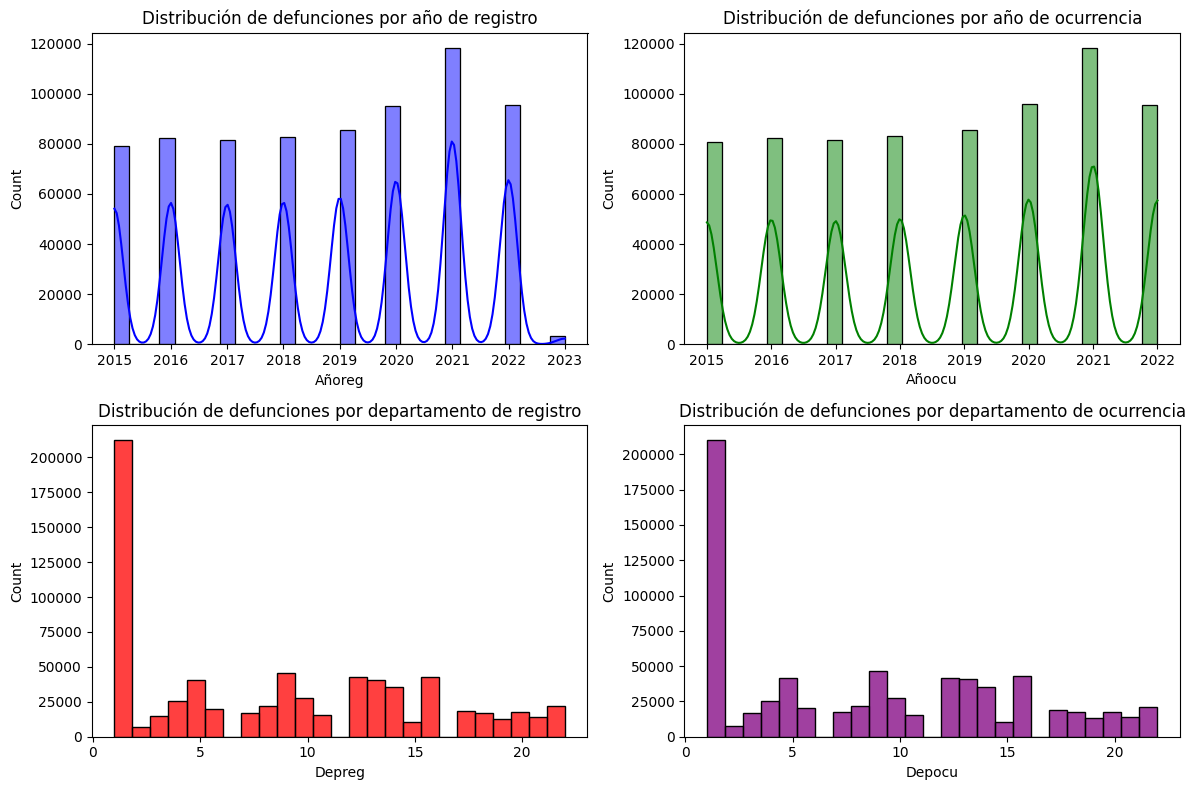

<ipython-input-69-c86d11623fec>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.index, y=top_causes.values, palette='viridis')


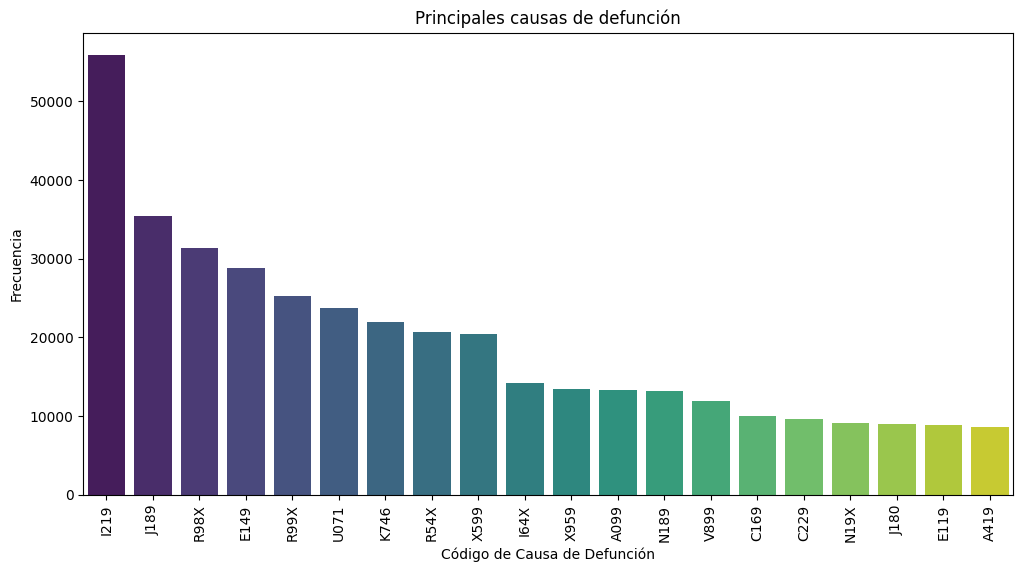

In [69]:
def plot_relevant_histograms(df):
    relevant_columns = ['Añoreg', 'Añoocu', 'Depreg', 'Depocu', 'Caudef']
    df = df[relevant_columns].dropna()

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.flatten()

    # Histograma de registros por año de registro
    sns.histplot(df['Añoreg'], bins=30, kde=True, ax=axes[0], color='blue')
    axes[0].set_title("Distribución de defunciones por año de registro")

    # Histograma de registros por año de ocurrencia
    sns.histplot(df['Añoocu'], bins=30, kde=True, ax=axes[1], color='green')
    axes[1].set_title("Distribución de defunciones por año de ocurrencia")

    # Histograma de registros por departamento de registro
    sns.histplot(df['Depreg'], bins=25, kde=False, ax=axes[2], color='red')
    axes[2].set_title("Distribución de defunciones por departamento de registro")

    # Histograma de registros por departamento de ocurrencia
    sns.histplot(df['Depocu'], bins=25, kde=False, ax=axes[3], color='purple')
    axes[3].set_title("Distribución de defunciones por departamento de ocurrencia")

    plt.tight_layout()
    plt.show()

    # Histograma de las causas de muerte más comunes
    plt.figure(figsize=(12, 6))
    top_causes = df['Caudef'].value_counts().nlargest(20)  # 20 causas más comunes
    sns.barplot(x=top_causes.index, y=top_causes.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.title("Principales causas de defunción")
    plt.xlabel("Código de Causa de Defunción")
    plt.ylabel("Frecuencia")
    plt.show()

# Llamar a la función con el DataFrame
plot_relevant_histograms(df_final)


## Discusión de los Resultados
1. Distribución de Defunciones por Año de Registro y Año de Ocurrencia
Los primeros dos gráficos muestran la distribución de las defunciones en función del año de registro y el año de ocurrencia. Se pueden notar los siguientes puntos clave:

- Patrón Cíclico: Ambos gráficos presentan un comportamiento cíclico, lo que indica una posible estacionalidad en los registros de defunciones. Esto podría estar relacionado con factores como enfermedades estacionales, condiciones climáticas o brotes epidémicos.

- Pico en 2021: Se observa un aumento significativo en el número de defunciones en 2021, lo que podría estar relacionado con la pandemia de COVID-19. Este incremento es notable tanto en el registro como en la ocurrencia de defunciones.

- Disminución en 2022: Tras el pico de 2021, el número de defunciones parece disminuir en 2022, lo que sugiere una estabilización después del impacto de la pandemia.

- Diferencia entre Registro y Ocurrencia: Aunque ambas distribuciones son similares, es posible que haya diferencias entre el año en que ocurre una defunción y el año en que se registra, lo que puede deberse a retrasos administrativos en la documentación.

2. Distribución de Defunciones por Departamento de Registro y de Ocurrencia
Los siguientes dos gráficos muestran la cantidad de defunciones registradas y ocurridas por departamento:

- Alta concentración en un departamento específico: Se observa un departamento con una cantidad significativamente mayor de defunciones registradas y ocurridas. Esto sugiere que puede tratarse de un área con una alta densidad poblacional o que los registros de otros departamentos se concentran en un único punto administrativo.

- Distribución desigual: Existen departamentos con muchas menos defunciones en comparación con otros. Esto puede estar relacionado con la población, la accesibilidad a servicios médicos o la presencia de hospitales donde se registran más defunciones.

3. Principales Causas de Defunción
El último gráfico muestra las principales causas de defunción, y podemos notar lo siguiente:

- La causa más frecuente es el código I219, que corresponde a enfermedades cardiovasculares, específicamente el infarto agudo de miocardio. Esto es consistente con tendencias globales donde las enfermedades del corazón son una de las principales causas de muerte.

- Otras causas frecuentes incluyen J189 (neumonía), R98X y R99X (causas mal definidas o desconocidas). La presencia de códigos de causas no específicas podría indicar deficiencias en los registros médicos o falta de información en los certificados de defunción.

- Impacto de la pandemia: La presencia de U071 (COVID-19) refuerza la idea de que la pandemia tuvo un impacto considerable en la mortalidad durante los años recientes.

- Diversidad de causas: Además de enfermedades infecciosas y cardiovasculares, hay causas externas como V899 (accidentes de tráfico) y X599 (exposición a factores ambientales no especificados), lo que sugiere que no todas las muertes son atribuibles a enfermedades.

In [70]:
from scipy import stats

def normality_test(df):
    # Iterar sobre las columnas numéricas del DataFrame
    for col in df.select_dtypes(include=['number']).columns:
        stat, p_value = stats.normaltest(df[col].dropna())  # D'Agostino-Pearson
        print(f"\nTest de normalidad para {col}: p-value={p_value:.4f}")

        # Evaluar el p-value
        if p_value < 0.05:
            print("No sigue una distribución normal.")
        else:
            print("Sigue una distribución normal.")

# Ejecutar la función de test de normalidad sobre el DataFrame
normality_test(df_final)




Test de normalidad para Depreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mupreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mesreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Añoreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Depocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mupocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Sexo: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Diaocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mesocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Añoocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Edadif: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Perdif: p-value=0.0000
No sigue una distribución normal.

Test de normalida

## Discusión del Análisis de los Resultados del Test de Normalidad
Los resultados del test de normalidad de D'Agostino-Pearson indican que todas las variables numéricas en el conjunto de datos no siguen una distribución normal, ya que el p-value de cada prueba es igual a 0.0000, lo que es significativamente menor al umbral de 0.05. A continuación, se presentan algunas posibles interpretaciones y consideraciones sobre estos resultados:

1. P-Value y Normalidad
El p-value de 0.0000 para todas las variables indica una fuerte evidencia en contra de la hipótesis nula de normalidad. Esto significa que, con una confianza del 95%, podemos rechazar la hipótesis de que los datos siguen una distribución normal. La hipótesis nula de normalidad fue rechazada de manera consistente para todas las variables, sugiriendo que los datos no siguen una distribución gaussiana.

2. Posibles Razones para la Falta de Normalidad
  - Distribuciones Sesgadas o Asimétricas: Las variables podrían tener distribuciones sesgadas, lo que es común en los datos del mundo real. Por ejemplo, los datos de edades o los ingresos suelen seguir distribuciones sesgadas, con una cola larga hacia los valores más altos.

  - Presencia de Outliers: Los outliers pueden distorsionar los resultados de la prueba de normalidad. Si algunas observaciones en las variables numéricas están alejadas de la media, esto podría estar afectando la normalidad de los datos.

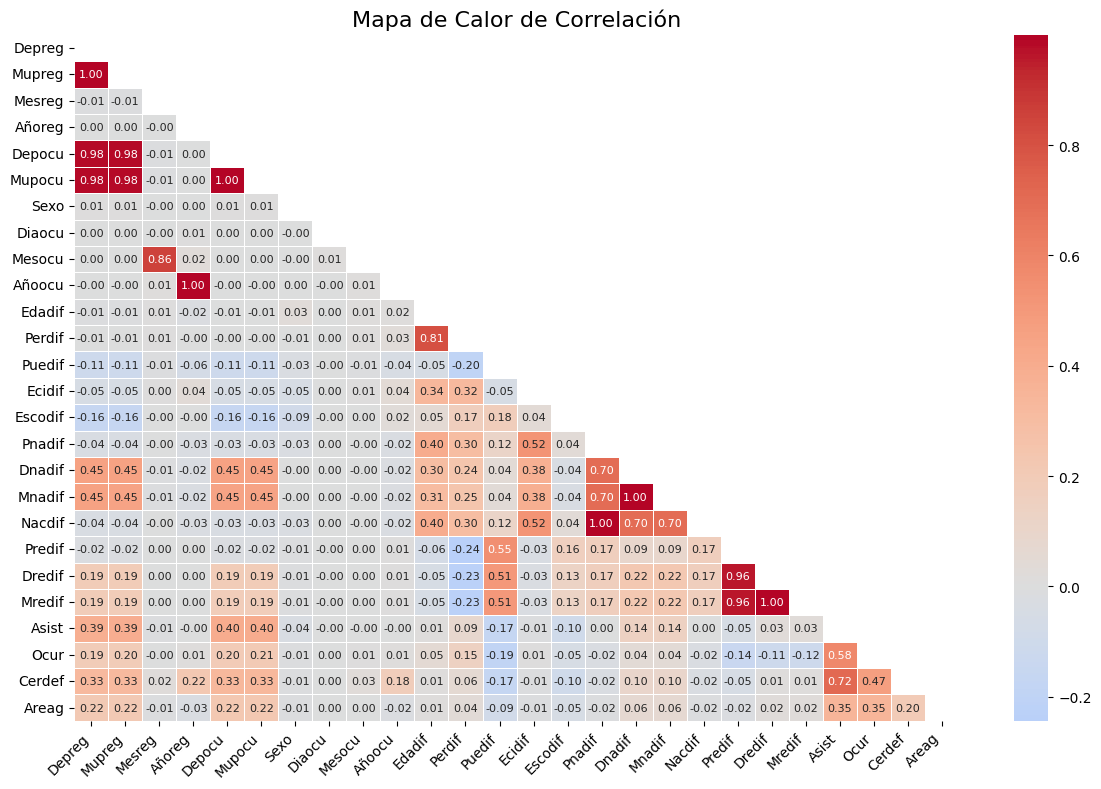

In [71]:
# Filtrar solo las columnas numéricas
df_numeric = df_final.select_dtypes(include=[float, int])

# Calcular la correlación
corr_matrix = df_numeric.corr()

# Crear la máscara para la parte superior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(
    corr_matrix,
    annot=True,            # Mostrar los valores numéricos dentro de las celdas
    fmt=".2f",            # Formato de los valores numéricos (con 2 decimales)
    cmap="coolwarm",      # Cambié a "coolwarm" para una mejor diferenciación visual
    center=0,             # El valor en el centro de la escala de colores
    mask=mask,            # Máscara para ocultar la parte superior de la matriz
    linewidths=0.5,       # Grosor de las líneas que separan las celdas
    annot_kws={"size": 8} # Tamaño de la fuente de los números dentro de las celdas
)

# Ajustar título y etiquetas
plt.title("Mapa de Calor de Correlación", fontsize=16)  # Título con un tamaño de fuente mayor
plt.xticks(rotation=45, ha="right")                    # Rotar las etiquetas del eje X para mejor visibilidad
plt.yticks(rotation=0)                                 # No rotar las etiquetas del eje Y

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el gráfico para evitar que los elementos se sobrepongan
plt.show()



## Discusión sobre el Mapa de Calor de Correlación
1. Correlaciones Altamente Positivas:

  - Se observa una fuerte correlación positiva entre Depocu, Mupocu y Mupreg (valores cercanos a 0.98-1.00), lo que sugiere que estas variables están estrechamente relacionadas y posiblemente representen dimensiones similares del mismo fenómeno.

  - La variable Dnadif muestra una correlación fuerte con Mnadif y Nacdif, con valores cercanos a 0.70, indicando que estas tres variables podrían estar midiendo aspectos similares.

  - Preif y Dreif tienen una correlación extremadamente alta (≈0.96), lo que indica que podrían estar describiendo casi la misma tendencia en los datos.

2. Correlaciones Negativas:

  - Escodif muestra una ligera correlación negativa con Puedif (≈ -0.20) y Dreif (≈ -0.16), lo que podría indicar una relación inversa entre el nivel educativo y estas variables.

  - Depreg y EscoDif muestran una correlación negativa débil, lo que sugiere que el nivel educativo podría influir en menor medida en esta variable.

3. Variables con Correlación Débil o Nula:

  - Variables como Sexo, Diaocu y Mesocu muestran correlaciones muy bajas con la mayoría de las otras variables (valores cercanos a 0), lo que indica que no están directamente relacionadas con la mayoría de los factores analizados.

  - Edadif tiene una correlación baja con casi todas las variables, lo que sugiere que no tiene un impacto significativo en el resto de los datos.

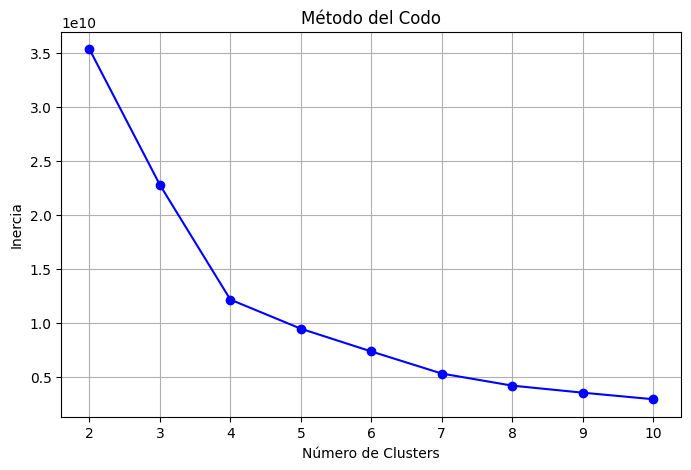

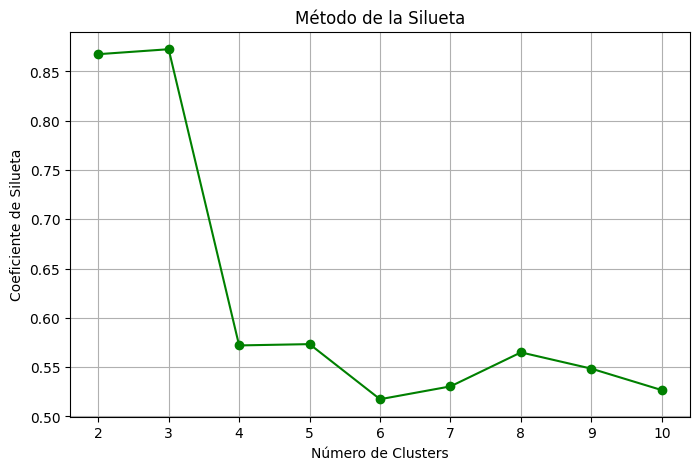

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas y eliminar filas con valores nulos
X = df_final.select_dtypes(include=['number']).dropna()

# Reducir el tamaño de los datos si es muy grande (opcional)
if len(X) > 10000:
    X_sample = X.sample(n=10000, random_state=42)  # Tomar una muestra aleatoria para evitar tiempos largos
else:
    X_sample = X

# Listas para almacenar métricas
inertia = []
silhouette = []
k_range = range(2, 11)  # Amplié el rango hasta 10 clusters para mayor flexibilidad

for k in k_range:
    # Ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300).fit(X_sample)
    inertia.append(kmeans.inertia_)

    # Calcular el coeficiente de silueta solo si hay más de 1 cluster y menos de 100K muestras
    if len(X_sample) < 100000:
        silhouette.append(silhouette_score(X_sample, kmeans.labels_))
    else:
        silhouette.append(None)  # No calcular para datasets grandes

# Gráfico del Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# Gráfico del Método de la Silueta (solo si se calculó)
if all(silhouette) and None not in silhouette:
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette, marker='o', linestyle='-', color='g')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de la Silueta')
    plt.grid(True)
    plt.show()
else:
    print("No se calculó el coeficiente de silueta debido al tamaño del dataset o falta de datos.")


## Discusión sobre los Resultados de Clustering
1. Análisis del Método del Codo
  - Se observa una disminución pronunciada en la inercia a medida que aumenta el número de clusters.

  - A partir de k = 4, la reducción en la inercia comienza a desacelerarse, formando un "codo".

  - Esto sugiere que 4 clusters podrían ser un buen punto de corte, ya que agregar más clusters no reduce significativamente la inercia.

 Conclusión: El número óptimo de clusters según el Método del Codo es 4.

2. Análisis del Método de la Silueta
  - Se observa que para k = 2, el coeficiente de silueta es el más alto (~0.88), lo que indica que los datos están bien separados en dos grupos.

  - A partir de k = 3, la silueta disminuye drásticamente, y para k ≥ 4, los valores están por debajo de 0.6, lo que sugiere que la calidad del clustering se deteriora.

  - Aunque k = 4 es recomendado por el Método del Codo, su coeficiente de silueta es más bajo (~0.55), indicando que los clusters podrían solaparse.

Conclusión: Según la Silueta, la mejor opción es k = 2 debido a la mayor separación entre grupos.



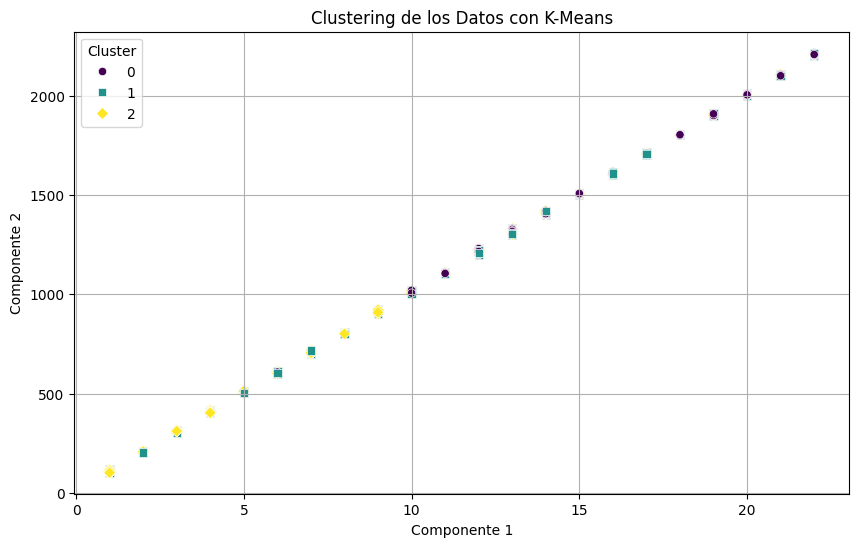

In [73]:
# Asegurarse de que las dimensiones coincidan (aseguramos que X_clean tiene el mismo índice que df_final)
df_final_clean = df_final.iloc[X_clean.index].copy()  # Filtrar df_final para que coincidan las filas con X_clean

# Aplicar clustering con K-Means en el conjunto limpio
kmeans = KMeans(n_clusters=3, random_state=42)
df_final_clean["Cluster"] = kmeans.fit_predict(X_clean)

# Visualizar los clusters en un gráfico de dispersión (suponiendo que X_clean tiene solo dos dimensiones)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_clean.iloc[:, 0],
    y=X_clean.iloc[:, 1],
    hue=df_final_clean["Cluster"],
    palette="viridis",
    style=df_final_clean["Cluster"],  # Diferenciar los puntos de acuerdo al cluster
    markers=["o", "s", "D"]  # Diferentes marcadores para cada cluster
)
plt.title("Clustering de los Datos con K-Means")
plt.xlabel("Componente 1")  # Asumido que X_clean tiene componentes que se pueden interpretar como tales
plt.ylabel("Componente 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)  # Agregar grilla para mayor claridad
plt.show()



## Discusión sobre el Clustering con K-Means
El gráfico muestra la asignación de datos a tres clusters utilizando el algoritmo K-Means. Analicemos los resultados:

1. Análisis Visual del Gráfico
- Los puntos están distribuidos en una línea diagonal, lo que sugiere una estructura de datos fuertemente correlacionada.

- Se identifican tres clusters con diferentes colores y formas de marcador:

  - Cluster 0 (puntos oscuros)

  - Cluster 1 (cuadrados azulados)

  - Cluster 2 (rombos amarillos)

Parece que la separación de los clusters sigue un patrón lineal, lo cual puede indicar que los datos presentan una relación matemática simple (posiblemente una progresión o un conjunto de datos altamente estructurado).

2. Interpretación de los Clusters
  - Si los datos provienen de un análisis de regresión o series temporales, el clustering puede estar segmentando los datos en diferentes fases o categorías dentro de una tendencia global.

  - Si se trata de datos no lineales, puede ser que el número de clusters no sea el adecuado. En este caso, evaluar un mayor o menor número de clusters con el método del codo y el coeficiente de silueta podría mejorar la segmentación.

  - Si los datos representan categorías bien definidas, entonces los clusters podrían corresponder a clases naturales dentro del conjunto de datos.



## 2. Una vez hayan explorado los datos

## a. Describan la situación problemática que los lleva a plantear un problema a resolver.

Guatemala enfrenta serios retos en salud pública debido a la alta y diversa mortalidad de su población. El país presenta una de las tasas más altas de mortalidad en la región. Además, la violencia, las enfermedades y otras causas externas contribuyen de manera importante a la mortalidad.

## b. Problema Científico y Objetivos Preliminares

## Problema científico

¿Cuáles son los patrones más relevantes en las defunciones ocurridas en Guatemala entre 2013 y 2022, y cómo se relacionan con variables como sexo, edad, causa de muerte, mes de ocurrencia, año y ubicación geográfica?

## Objetivos preliminares

1. Identificar las principales causas de muerte en el país en el periodo de estudio.
2. Analizar la distribución de defunciones por sexo, edad, mes de ocurrencia y ubicación (departamento y municipio).
3. Detectar tendencias anuales y estacionales.
4. Generar visualizaciones y conclusiones que faciliten la interpretación de los hallazgos.

## c. Descripción de los datos

### Estado inicial

- Se encontraron valores faltantes en columnas como Añoocu y Sexo.
- La columna Edadif contenía valores erróneos como 999, lo cual representa datos faltantes.
- Algunas causas de muerte están agrupadas en categorías genéricas como R98X y R99X (causas mal definidas o sin asistencia).

### Limpieza realizada

- Se eliminaron filas con valores nulos en campos críticos como Añoocu y Mesocu.
- Se filtraron edades fuera del rango realista (por ejemplo, mayores a 120 años).
- Se construyeron nuevas columnas de fecha y se mapearon los códigos de causa de muerte con sus descripciones.

## d. Hallazgos

## Distribución de edad al fallecimiento

In [ ]:
import pandas as pd

def analizar_edad_defuncion(ruta_csv):
    df = pd.read_csv(ruta_csv)
    
    # Se asume que nadie vive más de 120 años
    df_filtrado = df[df["Edadif"] < 120]  
    
    # Calcular estadísticas
    promedio_edad = df_filtrado["Edadif"].mean()
    percentiles = df_filtrado["Edadif"].quantile([0.25, 0.50, 0.75])
    
    # Resultados
    print(f"Estadísticas de edad al fallecer:")
    print(f"Edad promedio de defunción: {promedio_edad:.2f} años")
    print(f"25% de las muertes ocurren antes de los {percentiles[0.25]:.0f} años.")
    print(f"50% de las muertes ocurren antes de los {percentiles[0.50]:.0f} años (mediana).")
    print(f"75% de las muertes ocurren antes de los {percentiles[0.75]:.0f} años.")
    
    # Contar valores erróneos
    valores_erroneos = (df["Edadif"] == 999).sum()
    print(f"Hay {valores_erroneos} registros con edad 999 (posibles datos faltantes).")


analizar_edad_defuncion("datos_combinados.csv")


### Conclusiones sobre la edad al fallecer (2013–2022)
**La edad promedio de defunción fue de 55.66 años**, lo que sugiere que una gran parte de la población fallece en edades relativamente jóvenes. Esta cifra está por debajo de la esperanza de vida promedio nacional del 2024 de 72.7 años, lo que podría indicar problemas en el acceso a salud, violencia, enfermedades crónicas o muertes prematuras.

1. **El 25% de las defunciones ocurrieron antes de los 35 años**, lo cual es una señal de alerta. Este grupo puede incluir causas como accidentes, homicidios, enfermedades congénitas o problemas de salud no tratados oportunamente.

2. **El 50% de las muertes ocurrieron antes de los 62 años**, indicando que la mitad de la población no alcanza la edad adulta mayor, lo que afecta las dinámicas familiares, laborales y del sistema de pensiones.

3. **El 75% de las defunciones ocurrieron antes de los 78 años**, lo que significa que solo una cuarta parte de las personas mueren a edades avanzadas.

**Existen 5,175 registros con edad 999**, lo que representa un número importante de datos inválidos o no reportados. Esto puede afectar la calidad del análisis y sugiere la necesidad de mejorar la recolección y validación de los datos en los registros de defunción.

Bibliografía
[Perfil de país - Guatemala](https://hia.paho.org/es/perfiles-de-pais/guatemala)
 

## Principales causas de muerte

Principales causas de muerte :

I219: 66,161 muertes
J189: 45,541 muertes
R98X: 34,582 muertes
E149: 34,318 muertes
R99X: 27,258 muertes
K746: 25,998 muertes
X599: 25,720 muertes
U071: 23,665 muertes
R54X: 23,587 muertes
I64X: 18,021 muertes


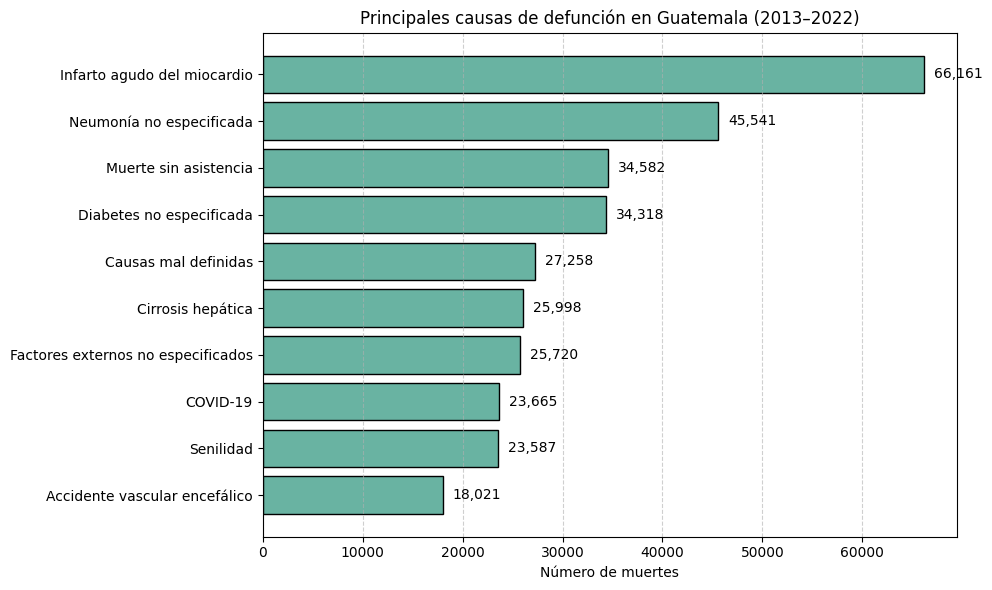

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv") 

# Contar las causas más frecuentes
causas_principales = df["Caudef"].value_counts().head(10)

# Mostrar resultados con etiquetas bonitas
print("Principales causas de muerte :\n")
for codigo, cantidad in causas_principales.items():
    print(f"{codigo}: {cantidad:,} muertes")



# Diccionario de códigos CIE-10 con descripciones
descripcion_causas = {
    "I219": "Infarto agudo del miocardio",
    "J189": "Neumonía no especificada",
    "R98X": "Muerte sin asistencia",
    "E149": "Diabetes no especificada",
    "R99X": "Causas mal definidas",
    "K746": "Cirrosis hepática",
    "X599": "Factores externos no especificados",
    "U071": "COVID-19",
    "R54X": "Senilidad",
    "I64X": "Accidente vascular encefálico"
}

# Datos de cantidad de muertes por causa
datos_causas = {
    "I219": 66161,
    "J189": 45541,
    "R98X": 34582,
    "E149": 34318,
    "R99X": 27258,
    "K746": 25998,
    "X599": 25720,
    "U071": 23665,
    "R54X": 23587,
    "I64X": 18021
}

# Crear DataFrame
df_causas = pd.DataFrame({
    "Código": list(datos_causas.keys()),
    "Descripción": [descripcion_causas[cod] for cod in datos_causas.keys()],
    "Muertes": list(datos_causas.values())
})

# Ordenar
df_causas = df_causas.sort_values(by="Muertes", ascending=True)

# Crear gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(df_causas["Descripción"], df_causas["Muertes"], edgecolor='black', color='#69b3a2')
plt.xlabel("Número de muertes")
plt.title("Principales causas de defunción en Guatemala (2013–2022)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height()/2,
             f"{int(width):,}", va='center')

plt.tight_layout()
plt.show()

## Conclusiones sobre las principales causas de defunción (2013–2022)
1. **Las enfermedades cardiovasculares representan la principal causa de muerte en Guatemala**, con el infarto agudo del miocardio (I219) como líder indiscutible, acumulando 66,161 muertes en el período. Esto pone en evidencia la alta prevalencia de enfermedades crónicas no transmisibles.

2. **Las infecciones respiratorias, como la neumonía no especificada (J189)**, causaron más de 45 mil muertes, lo que sugiere una carga significativa de enfermedades infecciosas, posiblemente asociadas a condiciones de salud pública, clima, acceso a atención médica y enfermedades respiratorias crónicas.

3. **La “muerte sin asistencia” (R98X)** ocupa un lugar alarmante con 34,582 muertes, lo cual indica que una gran cantidad de personas fallecieron sin recibir atención médica. Este dato puede estar relacionado con pobreza, ruralidad, barreras de acceso al sistema de salud o muertes súbitas.

4. **La diabetes mellitus no especificada (E149)** provocó 34,318 muertes, confirmando su impacto como una enfermedad crónica de alta letalidad en la población guatemalteca, especialmente si no se diagnostica ni trata adecuadamente.

5. **Más de 27 mil muertes fueron clasificadas bajo causas mal definidas (R99X)**, lo cual refleja limitaciones en el diagnóstico, registro y certificación de causas de defunción. Esto puede disminuir la calidad de los análisis y debe ser una prioridad para mejorar los sistemas de información en salud.

6. **El impacto del COVID-19 (U071), con 23,665 muertes registradas**, confirma la magnitud de la pandemia, aunque no alcanza a desplazar otras causas más persistentes en el tiempo como el infarto, la neumonía o la diabetes.

7. **Otras condiciones relevantes incluyen**:

- **Cirrosis hepática (K746):** 25,998 muertes, posiblemente asociadas a enfermedades hepáticas crónicas como hepatitis o alcoholismo.

- **Factores externos no especificados (X599):** 25,720 muertes, lo que podría incluir accidentes, violencia o suicidios no bien clasificados.

- **Senilidad (R54X):** 23,587 muertes, reflejando el envejecimiento poblacional sin causa específica registrada.

- **Accidente cerebrovascular (I64X):** 18,021 muertes, lo cual refuerza el peso de las enfermedades cerebrovasculares en la carga de enfermedad del país.

## Tendencia mensual de defunciones

Defunciones por mes:

Mesocu
Enero         73838
Febrero       65212
Marzo         71341
Abril         69747
Mayo          71102
Junio         72536
Julio         80782
Agosto        79550
Septiembre    77296
Octubre       74329
Noviembre     69186
Diciembre     73217
Name: count, dtype: int64


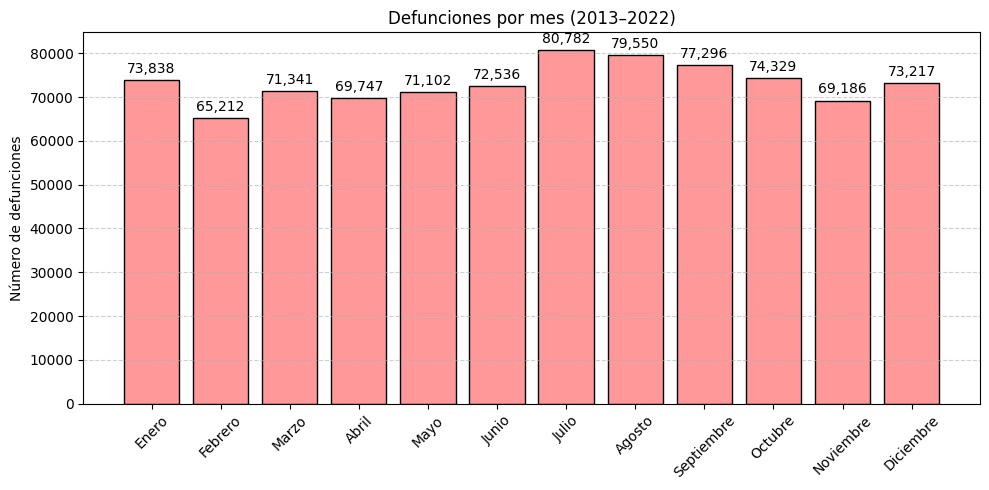

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv")

# Contar defunciones por mes
defunciones_por_mes = df["Mesocu"].value_counts().sort_index()

# Crear un diccionario para nombres de meses
meses = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

defunciones_por_mes.index = defunciones_por_mes.index.map(meses)

print("Defunciones por mes:\n")
print(defunciones_por_mes)

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(defunciones_por_mes.index, defunciones_por_mes.values, color="#ff9999", edgecolor="black")
plt.ylabel("Número de defunciones")
plt.title("Defunciones por mes (2013–2022)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores sobre cada barra
for i, v in enumerate(defunciones_por_mes.values):
    plt.text(i, v + 1000, f"{v:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Conclusiones sobre la distribución mensual de defunciones (2013–2022)

1. **Los meses con mayor número de defunciones fueron julio (80,782), agosto (79,550) y septiembre (77,296)**. Esta concentración sugiere un posible patrón estacional como las lluvias de invierno.
2. **Febrero fue el mes con menor cantidad de muertes (65,212), seguido de noviembre (69,186) y abril (69,747)**. Esto podría deberse a factores como condiciones climáticas más estables o menor circulación de enfermedades infecciosas.

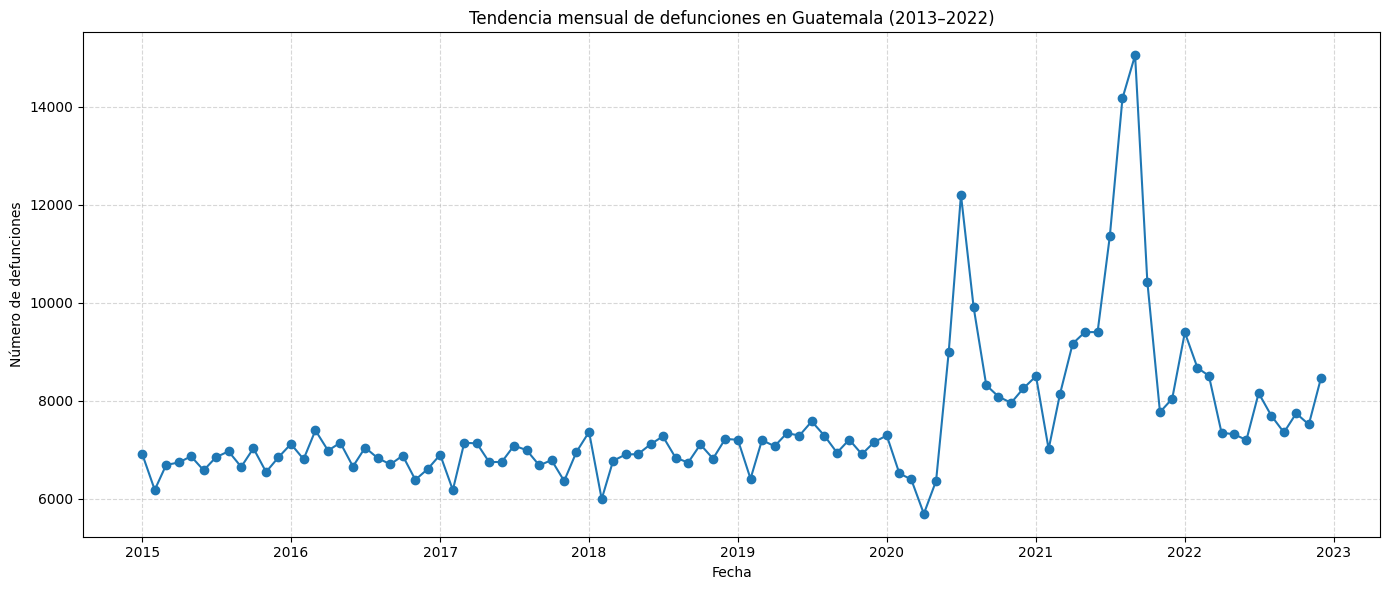

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv") 

df_limpio = df.dropna(subset=["Añoocu", "Mesocu"])

df_limpio["Añoocu"] = df_limpio["Añoocu"].astype(int)
df_limpio["Mesocu"] = df_limpio["Mesocu"].astype(int)

# Agrupar por año y mes
agrupado = df_limpio.groupby(["Añoocu", "Mesocu"]).size().reset_index(name="Defunciones")

# Crear columna de fecha (para el eje X)
agrupado["Fecha"] = pd.to_datetime(dict(year=agrupado["Añoocu"], month=agrupado["Mesocu"], day=1))

# Ordenar cronológicamente
agrupado = agrupado.sort_values("Fecha")

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(agrupado["Fecha"], agrupado["Defunciones"], marker='o')
plt.title("Tendencia mensual de defunciones en Guatemala (2013–2022)")
plt.xlabel("Fecha")
plt.ylabel("Número de defunciones")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Distribución por sexo

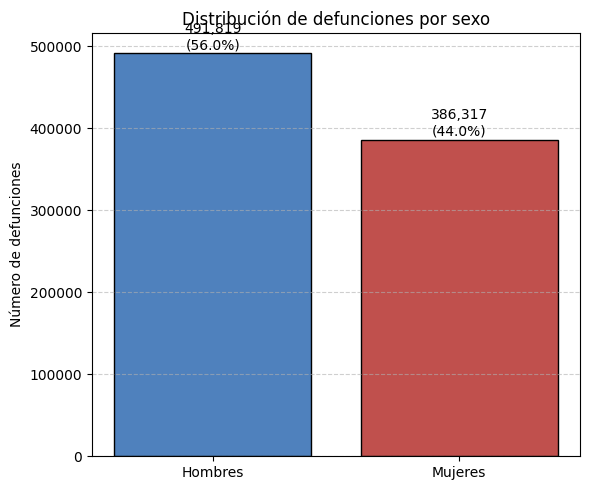

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv") 

# Contar defunciones por sexo
conteo_sexo = df["Sexo"].value_counts()
total = conteo_sexo.sum()
porcentajes = (conteo_sexo / total) * 100

labels = ["Hombres" if sexo == 1 else "Mujeres" if sexo == 2 else "Desconocido" for sexo in conteo_sexo.index]
valores = conteo_sexo.values

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, valores, color=["#4f81bd", "#c0504d"], edgecolor="black")
plt.title("Distribución de defunciones por sexo")
plt.ylabel("Número de defunciones")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, sexo in zip(bars, conteo_sexo.index):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
             f"{int(height):,}\n({porcentajes[sexo]:.1f}%)",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Conclusiones sobre la distribución por sexo
1. **Los hombres representaron el 56% del total de defunciones** entre 2013 y 2022, con 491,819 muertes registradas.
Esto indica que la mortalidad masculina ha sido consistentemente más alta, lo cual podría deberse a una combinación de factores.

2. **Las mujeres representaron el 44% del total, con 386,317 muertes**, lo que refleja una menor proporción, posiblemente asociada a una mayor esperanza de vida y diferentes perfiles de riesgo en salud.